In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
'''
Congratulations! The Acme Axegrinders, which you own, are the regular 
season champions of the National Squishyball League (NSL). Your team 
will now play a championship series against the Boondocks Barbarians, 
which had the second-best regular season record. You feel good about 
Acme’s chances in the series because Acme won exactly 60 percent of 
the hundreds of games it played against Boondocks this season. (The 
NSL has an incredibly long regular season.) The NSL has two special 
rules for the playoffs:

1.  The owner of the top-seeded team (i.e., you) gets to select the 
    length of the championship series in advance of the first game, 
    so you could decide to play a single game, a best two out of three 
    series, a three out of five series, etc., all the way up to a 50 
    out of 99 series.

2.  The owner of the winning team gets $1 million minus $10,000 for 
    each of the victories required to win the series, regardless of 
    how many games the series lasts in total. Thus, if the top-seeded 
    team’s owner selects a single-game championship, the winning owner 
    will collect $990,000. If he or she selects a 4 out of 7 series, 
    the winning team’s owner will collect $960,000. The owner of the 
    losing team gets nothing.
    
Since Acme has a 60 percent chance of winning any individual game against 
Boondocks, Rule 1 encourages you to opt for a very long series to improve 
Acme’s chances of winning the series. But Rule 2 means that a long series 
will mean less winnings for you if Acme does take the series.

How long a series should you select in order to maximize your expected 
winnings? And how much money do you expect to win?
'''

In [2]:
def play_one_series(g):
    """simulates one best-out-of-g series and returns Acme's winnings"""

    wins = 0
    losses = 0
    
    while wins < (g // 2) + 1 and losses < (g // 2) + 1:
        if np.random.rand() <= 0.6:
            wins += 1
        else:
            losses += 1
    else:
        if wins > losses:
            return 1000000 - (10000 * g)  # winnings == 1000000 - (10000 * g)
        else:
            return 0
        
        
def play_many(g, number_of_sims):
    """estimates the expected value of the winnings
     for a best-out-of-g series
    """
    
    winnings = 0
    for i in range(number_of_sims):
        winnings += play_one_series(g)

    return winnings/float(number_of_sims)

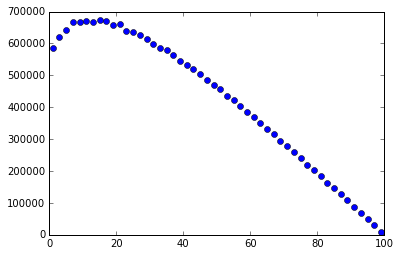

In [5]:
# Let's use the play_many function to get a rough idea of the
# expected winnings of series of different lengths:

all_possible_series_lengths = range(1, 100, 2)
rough_expected_winnings = [play_many(g, 3000) for g in all_possible_series_lengths]

plt.plot(all_possible_series_lengths, rough_expected_winnings, 'bo')

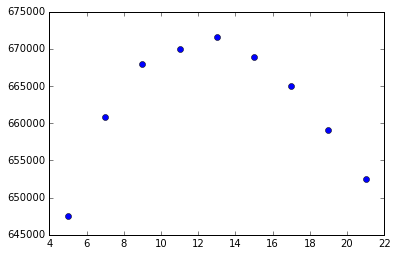

In [6]:
# Ok. It looks like the series with the highest
# expected value is somewhere between 5 and 21. 
# Let's focus on those series and run some more
# extensive (i.e., more accurate) simulations:

series_lengths_5_thru_21 = range(5, 22, 2)
expected_winnings_5_thru_21 = [play_many(g, 250000) for g in series_lengths_5_thru_21]

plt.plot(series_lengths_5_thru_21, expected_winnings_5_thru_21, 'bo')

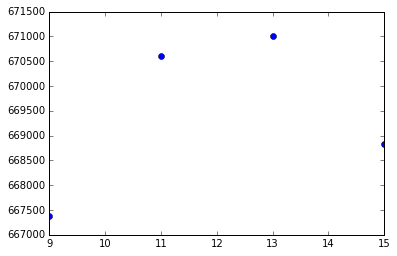

In [7]:
# Let's narrow our focus again and only look at
# series that are 9, 11, 13, and 15 games long:

series_lengths_9_thru_15 = range(9, 16, 2)
expected_winnings_9_thru_15 = [play_many(g, 10000000) for g in series_lengths_9_thru_15]

plt.plot(series_lengths_9_thru_15, expected_winnings_9_thru_15, 'bo')

In [8]:
# Alright! It looks like a best-out-of-13 series has the highest
# expected winnings, and a best-out-of-11 series has the
# second-highest expected winnings. 

# Let's run a final round of simulations to get even more 
# accurate estimates for 11- and 13-game series.

exp_winnings_11 = play_many(11, 50000000)
exp_winnings_13 = play_many(13, 50000000)

print "Expected winnings for best-out-of-11 series:", exp_winnings_11
print "Expected winnings for best-out-of-13 series:", exp_winnings_13

Expected winnings for best-out-of-11 series: 670753.7332
Expected winnings for best-out-of-13 series: 670937.5446


In [ ]:
# So we have some answers!
#
# Q: How long a series should you select in order to maximize 
#    your expected winnings? 
# A: 13 games
#
# Q: And how much money do you expect to win?
# A: About $670,900